In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/My_Colab_Notebook/Soft Computing/Assignment-3/Dataset 2.csv' , engine='python')
df

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [4]:
df['polarity'].value_counts()

0    8000
1    2314
Name: polarity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


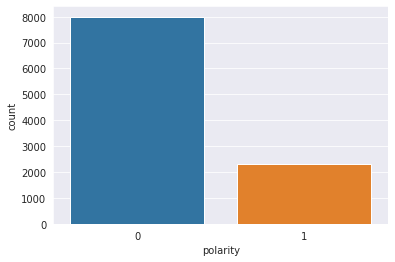

In [5]:
sns.set_style("darkgrid")
sns.countplot(df['polarity'])

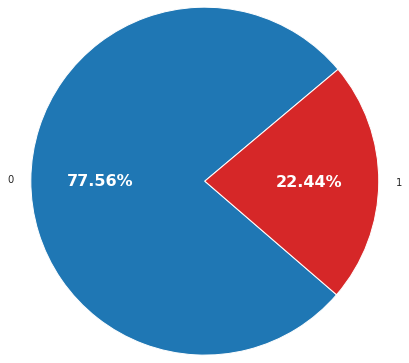

In [6]:

exp_labels=['0','1']

fig1, ax1 = plt.subplots()

_, _, autopcts = ax1.pie(df['polarity'].value_counts(),explode= None, labels=exp_labels,autopct='%0.2f%%',
        radius=2, shadow=False, startangle=40, colors=('tab:blue', 'tab:red') )

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':16})
plt.show()

From above, it is seen that the dataset is not balanced


Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.

In [7]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['text']=df['text'].apply(denoise_text)


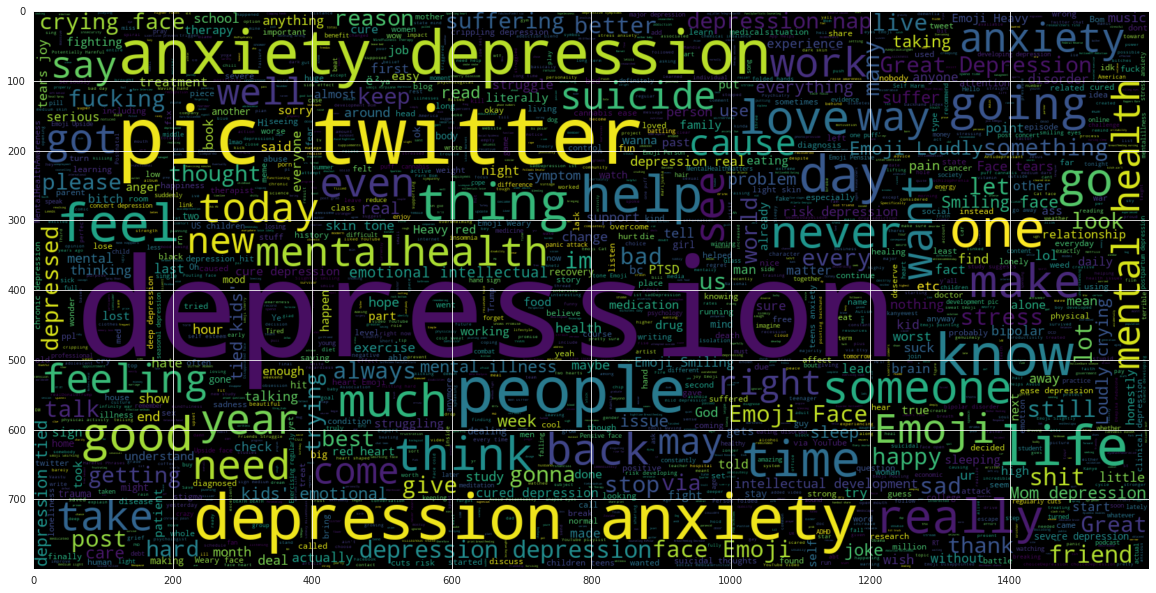

In [9]:

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df['polarity'] == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

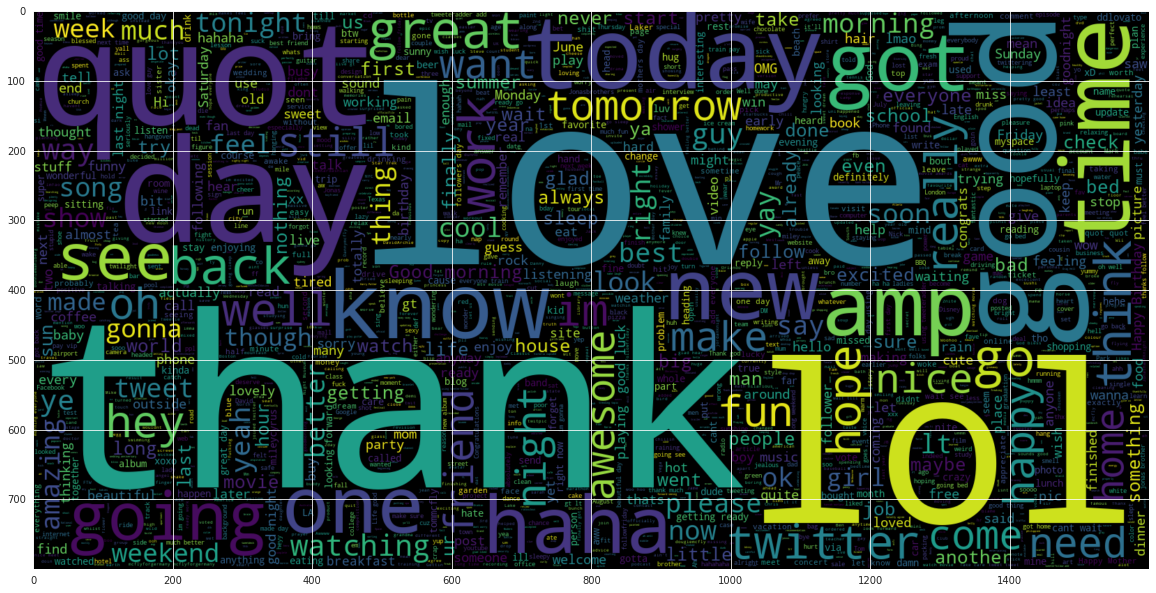

In [10]:

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df['polarity'] == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [11]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus

['real',
 'good',
 'moment.',
 'missssssssss',
 'much,',
 'reading',
 'manga',
 '@comeagainjen',
 '@lapcat',
 'Need',
 'send',
 "'em",
 'accountant',
 'tomorrow.',
 'Oddly,',
 'even',
 'referring',
 'taxes.',
 'supporting',
 'evidence,',
 'though.',
 'ADD',
 'MYSPACE!!!',
 'myspace.com/LookThunder',
 'sleepy.',
 'good',
 'times',
 'tonight',
 'though',
 '@SilkCharm',
 're:',
 '#nbn',
 'someone',
 'already',
 'said,',
 'fiber',
 'home',
 'mean',
 'least',
 'regular',
 '23',
 '24ï¿½C',
 'possible',
 'today.',
 'Nice',
 'nite',
 'twitterville',
 'workout',
 '-ciao',
 '@daNanner',
 'Night,',
 "darlin'!",
 'Sweet',
 'dreams',
 'Good',
 'morning',
 'everybody!',
 'Finally!',
 'created',
 'WordPress',
 'Blog.',
 "There's",
 'already',
 'blog',
 'Seattle',
 'Coffee',
 'Community',
 '...',
 'kisha',
 'cnt',
 'get',
 'u',
 'til',
 'get',
 'frm',
 'u',
 'remember',
 'ur',
 'top',
 '@nicolerichie',
 'Yes',
 'remember',
 'band,',
 'Awesome,',
 'please',
 'reply',
 'really',
 'love',
 'reflections',

In [12]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'Depression': 288,
 "I'm": 633,
 'back': 231,
 'day': 369,
 'depression': 1246,
 'get': 434,
 'go': 309,
 'going': 306,
 'good': 447,
 'got': 288,
 'know': 321,
 'like': 497,
 'love': 418,
 'new': 269,
 'one': 273,
 'see': 282,
 'think': 239,
 'time': 273,
 'u': 306,
 'â\x80¦': 363}

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

  

Unigram Analysis

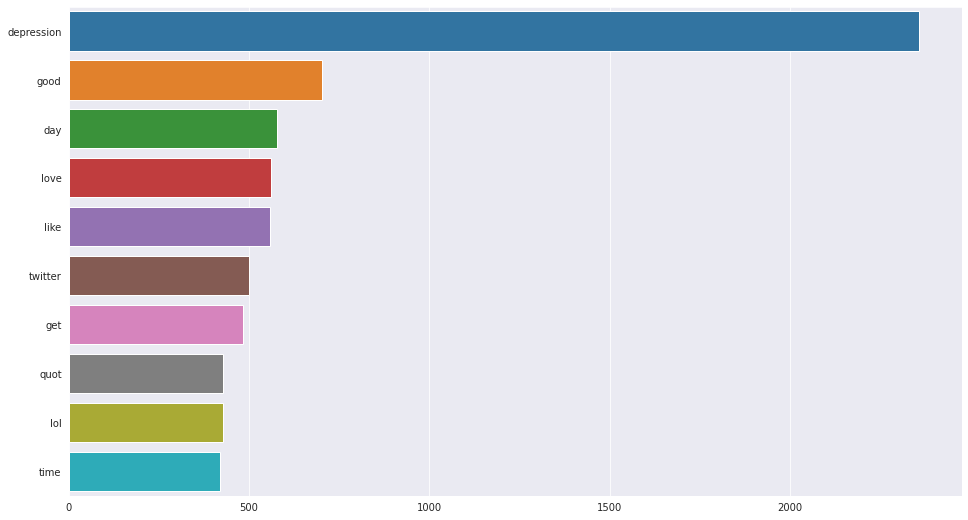

In [14]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

Bigram Analysis

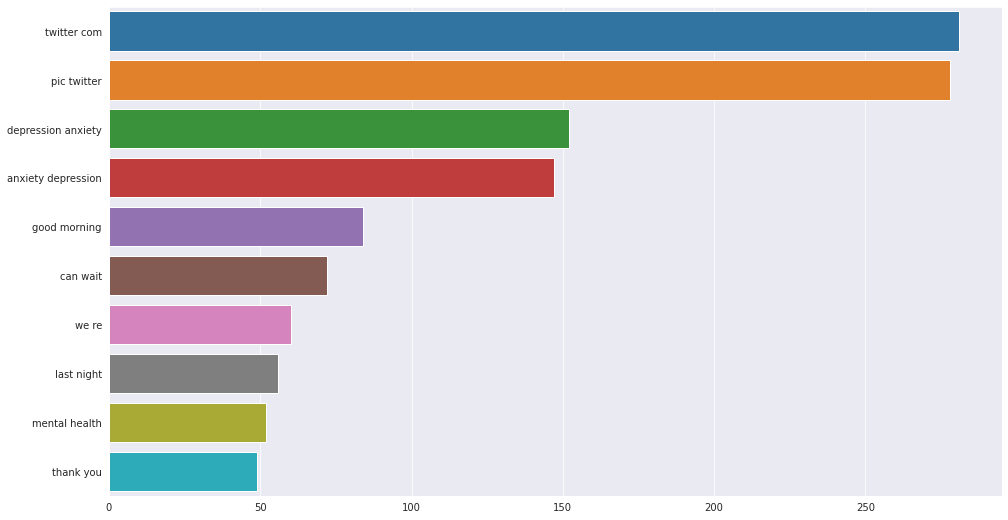

In [15]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

Trigram Analysis

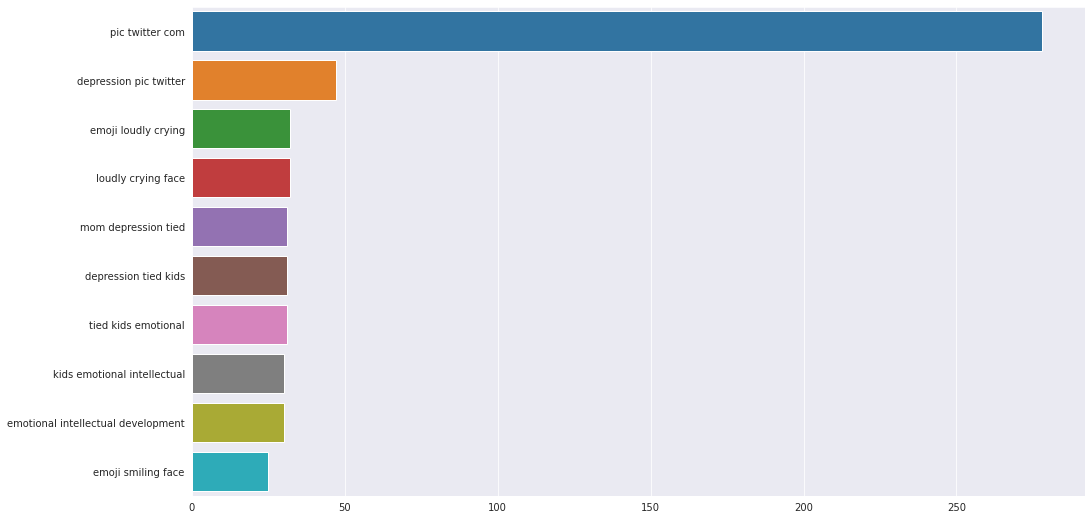

In [16]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

Splitting the data into 2 parts - training and testing data

In [17]:
df.isnull().sum()

text        0
polarity    0
dtype: int64

In [18]:
###Drop Nan Values
df=df.dropna()
df

,text,polarity
0,"real good moment. missssssssss much,",0
1,reading manga,0
2,@comeagainjen,0
3,@lapcat Need send 'em accountant tomorrow. Odd...,0
4,ADD MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,"Depression G Herbo mood on, i'm done stressing...",1
10310,depression succumbs brain makes feel like neve...,1
10311,"Ketamine Nasal Spray Shows Promise Depression,...",1
10312,dont mistake bad day depression! everyone 'em!,1


In [19]:
# converting label column to integer
df=df.astype({'polarity':int})

In [20]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.polarity,random_state = 0)

In [21]:
max_features = 10000
maxlen = 300

Tokenizing Text -> Repsesenting each word by a number

Mapping of orginal word to number is preserved in word_index property of tokenizer

Tokenized applies basic processing like changing it to lower case, explicitely setting that as False

Lets keep all text to 300, add padding to news with less than 300 words and truncating long ones

In [22]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [23]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [24]:
X_test

array([[   0,    0,    0, ...,  876,  342, 5672],
       [   0,    0,    0, ...,  352,   97,   35],
       [   0,    0,    0, ...,  599,  377,   42],
       ...,
       [   0,    0,    0, ...,  388,  639, 2970],
       [   0,    0,    0, ...,  699, 1319,   51],
       [   0,    0,    0, ..., 3297, 3296,  895]], dtype=int32)

In [25]:
EMBEDDING_FILE = '/content/drive/MyDrive/My_Colab_Notebook/Soft Computing/Project/dataset/glove.twitter.27B.100d.txt'
#EMBEDDING_FILE = '/content/drive/MyDrive/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float64')


embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))
embeddings_index.keys()

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
print(word_index)
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


{'depression': 1, "i'm": 2, 'good': 3, 'day': 4, 'love': 5, 'like': 6, 'twitter': 7, 'get': 8, 'lol': 9, 'time': 10, 'quot': 11, 'know': 12, 'thanks': 13, 'anxiety': 14, 'go': 15, 'u': 16, 'going': 17, 'today': 18, 'one': 19, 'com': 20, 'â\x80¦': 21, 'got': 22, 'it': 23, 'emoji': 24, 'see': 25, 'great': 26, 'pic': 27, 'new': 28, 'you': 29, 'back': 30, 'well': 31, 'really': 32, 'amp': 33, 'night': 34, 'think': 35, 'much': 36, 'happy': 37, 'work': 38, '2': 39, 'im': 40, 'people': 41, 'haha': 42, 'hope': 43, 'me': 44, 'face': 45, 'morning': 46, 'life': 47, 'need': 48, '3': 49, 'oh': 50, 'hey': 51, 'feel': 52, "can't": 53, 'would': 54, 'better': 55, 'thank': 56, 'way': 57, 'last': 58, "that's": 59, 'fun': 60, 'make': 61, 'still': 62, 'right': 63, 'want': 64, "i'll": 65, 'everyone': 66, 'nice': 67, 'home': 68, 'wait': 69, 'never': 70, 'best': 71, 'come': 72, 'gonna': 73, 'tomorrow': 74, 'watching': 75, 'now': 76, 'us': 77, 'i': 78, 'getting': 79, 'take': 80, "i've": 81, 'awesome': 82, 'bed'

In [ ]:
batch_size = 256
epochs = 10
embed_size = 100
learning_rate=0.001

## Applying BiDirectional RNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 512)          182784    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 1024)         1049600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300, 128)          139392    
_________________________________________________________________
dropout (Dropout)            (None, 300, 128)          0         
_________________________________________________________________
dense (Dense)                (None, 300, 1)            129       
Total params: 2,371,905
Trainable params: 1,371,905
Non-trainable params: 1,000,000
______________________________________

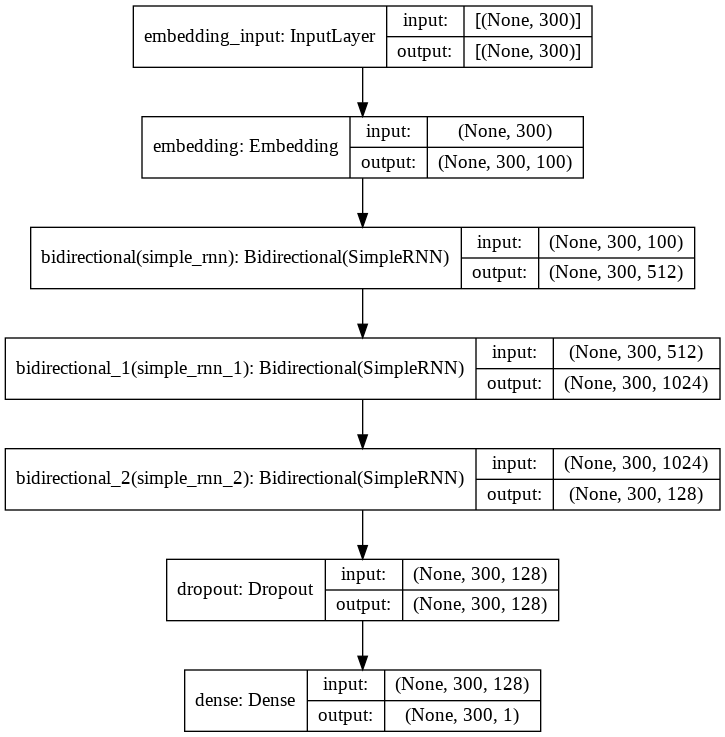

In [ ]:
from tensorflow.keras.layers import LSTM,SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.utils.vis_utils import plot_model

## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model1.add(Bidirectional(SimpleRNN(256, return_sequences = True, dropout = 0.2)))
model1.add(Bidirectional(SimpleRNN(512, return_sequences = True, dropout = 0.2)))
model1.add(Bidirectional(SimpleRNN(64, return_sequences = True, dropout = 0.2)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())
plot_model(model1, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.summary()

NameError: ignored

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size = batch_size , 
                    validation_data = (X_test,y_test) ,
                    epochs = epochs )

ANALYSIS AFTER TRAINING OF MODEL

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()